# Classificação de imagens com CNN (Redes Neurais Convolucionais Simples)

In [47]:
# Importando bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
# Dataset
(dataset_treino, labels_treino), (dataset_teste, labels_teste) = mnist.load_data()

In [49]:
#Normalização
dataset_treino = dataset_treino.astype('float32') / 255.0
dataset_teste = dataset_teste.astype('float32') / 255.0

In [50]:
# Redimensionamento
dataset_treino = np.expand_dims(dataset_treino, -1)
dataset_teste = np.expand_dims(dataset_teste, -1)

In [51]:
# One-hot encoding dos labels
labels_treino_cat = to_categorical(labels_treino, 10)
labels_teste_cat = to_categorical(labels_teste, 10)

In [52]:
#Funções auxiliares para criação de modelos simples
def criar_cnn_simples_2camadas():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  return model

In [53]:
def criar_cnn_simples_3camadas():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [54]:
# Compila e treinamento dos modelos
modelos = {
  'CNN 2 Camadas': criar_cnn_simples_2camadas(),
  'CNN 3 Camadas': criar_cnn_simples_3camadas()
}

historicos = {}

c:\Users\josaf\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
print("dataset_treino:", dataset_treino.shape)
print("dataset_teste:", dataset_teste.shape)

dataset_treino: (60000, 28, 28, 1)
dataset_teste: (10000, 28, 28, 1)


In [56]:
print("labels_treino:", labels_treino.shape)
print("labels_teste:", labels_teste.shape)

labels_treino: (60000,)
labels_teste: (10000,)


Treinamento do modelo: CNN 2 Camadas
Epoch 1/5
844/844 - 8s - 9ms/step - accuracy: 0.9455 - loss: 0.1912 - val_accuracy: 0.9795 - val_loss: 0.0669
Epoch 2/5
844/844 - 7s - 8ms/step - accuracy: 0.9826 - loss: 0.0564 - val_accuracy: 0.9853 - val_loss: 0.0479
Epoch 3/5
844/844 - 7s - 8ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 4/5
844/844 - 7s - 8ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.9888 - val_loss: 0.0399
Epoch 5/5
844/844 - 7s - 8ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9903 - val_loss: 0.0365
Acuracia em teste CNN 2 Camadas:0.9897
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


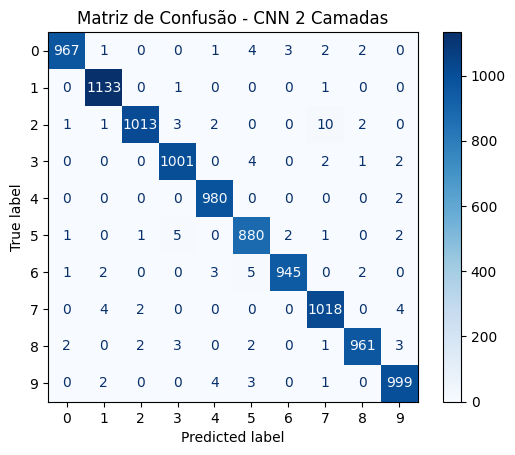

Treinamento do modelo: CNN 3 Camadas
Epoch 1/5
844/844 - 9s - 11ms/step - accuracy: 0.9415 - loss: 0.1906 - val_accuracy: 0.9843 - val_loss: 0.0497
Epoch 2/5
844/844 - 8s - 9ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9840 - val_loss: 0.0539
Epoch 3/5
844/844 - 7s - 9ms/step - accuracy: 0.9883 - loss: 0.0381 - val_accuracy: 0.9895 - val_loss: 0.0394
Epoch 4/5
844/844 - 7s - 9ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9882 - val_loss: 0.0392
Epoch 5/5
844/844 - 7s - 9ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9910 - val_loss: 0.0365
Acuracia em teste CNN 3 Camadas:0.9920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


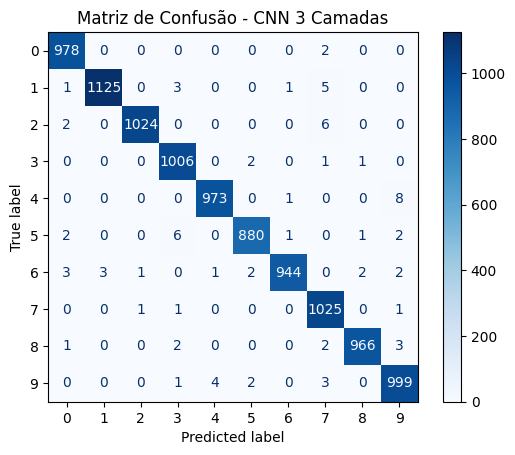

In [57]:
for nome, modelo in modelos.items():
  print(f"Treinamento do modelo: {nome}")
  modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  historico = modelo.fit(dataset_treino, labels_treino_cat, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
  historicos[nome] = historico

  # Avaliação final
  loss, acc = modelo.evaluate(dataset_teste, labels_teste_cat, verbose=0)
  print(f'Acuracia em teste {nome}:{acc:.4f}')

  # Matriz de confusão
  predicoes = modelo.predict(dataset_teste)
  pred_labels = np.argmax(predicoes, axis=1)
  cm = confusion_matrix(labels_teste, pred_labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title(f"Matriz de Confusão - {nome}")
  plt.show()

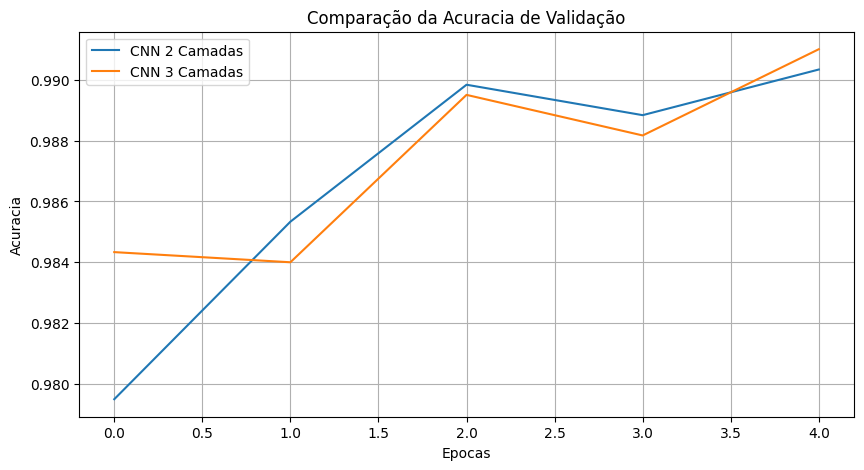

In [59]:
# Comparação dos historicos de acuracia
plt.figure(figsize=(10,5))
for nome, historico in historicos.items():
  plt.plot(historico.history['val_accuracy'], label=nome)
plt.title('Comparação da Acuracia de Validação')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


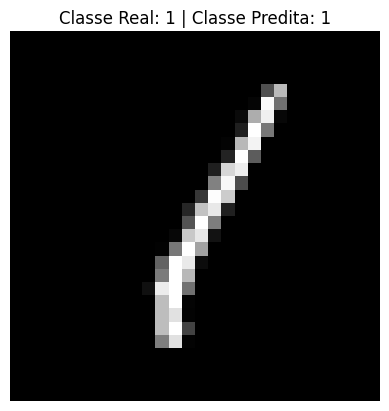

In [67]:
# Testar a predicão
indice = np.random.randint(0, len(dataset_teste))
imagem = dataset_teste[indice]
rotulo_real = labels_teste[indice]

# Expande a dimensão para simular um batch com 1 imagem
imagem_expandida = np.expand_dims(imagem, axis=0)

# Predição
pred_prob = modelo.predict(imagem_expandida)
classe_predita = np.argmax(pred_prob)

# Mostra a imagem e resultado
plt.imshow(imagem.squeeze(), cmap='gray')
plt.title(f'Classe Real: {rotulo_real} | Classe Predita: {classe_predita}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


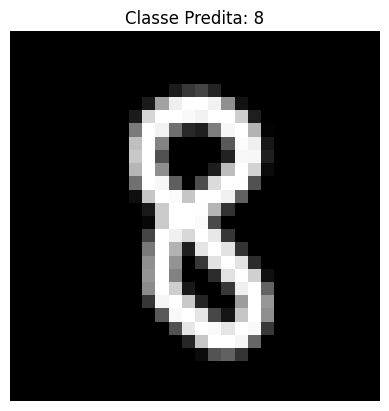

In [80]:
# Testar com imagem desenhada
from PIL import Image

# Caminho da imagem e converte em escala de cinza
imagem_usuario = Image.open('minha_imagem3.png').convert('L')

# Redimensona para 28 x 28
imagem_redimensionada = imagem_usuario.resize((28,28))

# Inverte cores
imagem_invertida = 255 - np.array(imagem_redimensionada)

# Normaliza os pixels
imagem_normalizada = imagem_invertida / 255.0

# Adiciona dimensões
imagem_final = np.expand_dims(imagem_normalizada, axis=(0,-1))

# Predição
predicao = modelo.predict(imagem_final)
classe_predita = np.argmax(predicao)

# Mostra a imagem e resultado
plt.imshow(imagem_final.squeeze(), cmap='gray')
plt.title(f'Classe Predita: {classe_predita}')
plt.axis('off')
plt.show()